<div dir=rtl>
<font color='red' size="6">آماده سازی نوت بوک</font>
<div dir=rtl>

><font size = "4"> 1.  قبل از هر کاری، با استفاده از مسیر نوشته شده در خط پایین، یک کپی از این نوتبوک در گوگل درایو خودتان بسازید و تمرین را در آن نسخه حل کنید.



<div dir=ltr>
<font size = "4" color='blue'>
File --> Save a copy in Drive
</font>
<div dir=rtl>

><font size = "4"> 2.   برای دسترسی به تصاویر مورد نیاز در این تکلیف، بدون اعمال هیچ تغییری در بلوک زیر، آن را اجرا کنید. با این کار فایل های مربوط به تکلیف (تصاویر) دانلود و در فولدر کولب شما قرار داده می شوند. انجام این مرحله پس از هر بار قطع شدن از کولب و اتصال دوباره، ضروری است. یعنی اگر مثلا یک سوال را حل کردید و بعد کولب را بستید یا مدتی با آن کار نکردید و اتصالتان به طور خودکار قطع شد، در اقدام بعدیتان برای نوشتن بقیه‌ی تمرین، حتما این بلوک باید دوباره اجرا شود.

In [2]:
#@title RUN THIS BLOCK WITHOUT ANY CHANGE to download the data
!wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=1_AbCo7shlrAPA5C3ub8smakCCdNnaRbG&export=download&authuser=0&confirm=t&uuid=d1fa3111-dbfc-414e-84e3-c4e66c004c00&at=APZUnTUhB_03yvHtcoJ3grMv6-IG:1698755987446' -O 'DIP_HW2.zip'
!unzip DIP_HW2.zip

--2023-12-01 11:34:40--  https://drive.usercontent.google.com/download?id=1_AbCo7shlrAPA5C3ub8smakCCdNnaRbG&export=download&authuser=0&confirm=t&uuid=d1fa3111-dbfc-414e-84e3-c4e66c004c00&at=APZUnTUhB_03yvHtcoJ3grMv6-IG:1698755987446
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.204.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 445128 (435K) [application/octet-stream]
Saving to: ‘DIP_HW2.zip’

DIP_HW2.zip         100%[===================>] 434.70K  --.-KB/s    in 0.005s  

2023-12-01 11:34:40 (92.4 MB/s) - ‘DIP_HW2.zip’ saved [445128/445128]

Archive:  DIP_HW2.zip
  inflating: Blur_Hand.png           
  inflating: Hand.png                
  inflating: noisy_brain.png         


# Imports
<div dir=rtl>
<font color="blue" size="6">فراخوانی کتابخانه ها</font>
<div dir=rtl>




In [3]:
import cv2 as cv
from scipy.fft import fft2, fftshift, ifft2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from PIL import Image
import sys
import matplotlib.image as mpimg
import random

# Any Helper Functions

<div dir=rtl>
<font color="blue" size = "4">در صورت نیاز یا برای راحتی خودتان می‌توانید توابع کمکی‌ (مثلا برای عملیات‌های پر تکرار) این جا تعریف کنید (همه در همین بلوک).</font>
</div>



In [ ]:
###

# ENTER YOUR CODE HERE.

###

# Question 5: Low Pass Filters (30%)

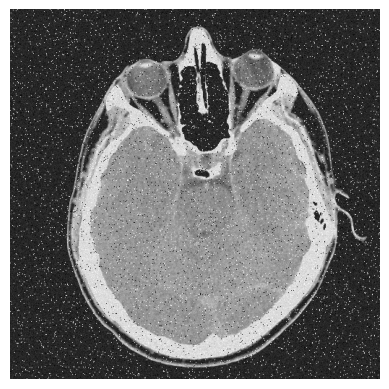

In [18]:
#@title Q5 - Part 1 (5%)
img = cv.imread('noisy_brain.png', cv.IMREAD_GRAYSCALE)
# print(image.shape)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

فیلتر های میانه :زیرا این فیلتر ها نویزهای ایمپالس را حدف می کنند

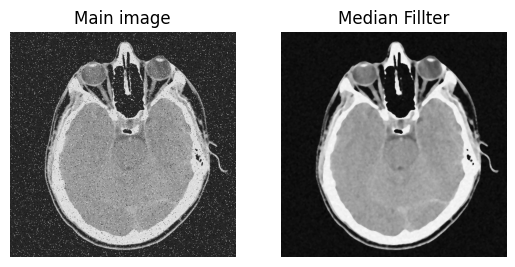

In [19]:
#@title Q5 - Part 2 (10%)
median_fillter = cv.medianBlur(img, 5)

fig, axs = plt.subplots(1, 2)
axs[0].set_title('Main image')
axs[1].set_title('Median Fillter')
axs[0].imshow(img, cmap='gray')
axs[1].imshow(median_fillter, cmap='gray')

for ax in axs:
    ax.axis('off')
plt.show()

In [ ]:
#@title Q5 - Part 3 (10%)

# NO CODE REQUIRED FOR THIS PART.

<div dir=rtl><font color='green' size="5">جواب سوال ۵-۳</font>
<div>

<div dir=rtl><font size="4">
هنگامی که تبدیل فوریه انجام میدهیم یک سیگنال پریودیک متناوب بدست میاریم که زمانی که میخواهیم آن را با تابع متناوب دیگر مثلا کانوال کنیم ممکن است هنگام کانوال کردن قسمتی از پنجره هم در پالس جلو و عقب تاثیر بگذارد مانند شکل صفحه20 اسلاید ششم،به همین دلیل با اضافه کردن پدینگ از رو هم افتادن ناخواسته سیگنال ها
جلوگیری می کنیم

تبدیل فوریه به مرکز تصویر باعث می شود که قسمت دی سی تصویر در مرکز بی افتد و ما بهتر بتوانیم تصویر را مشاهده کنیم در غیر اینصورت قسمت دی سی تصویر در لبه ها می افتد که عمل پردازش را برای ما سخت می کند. </font><br />
</div>

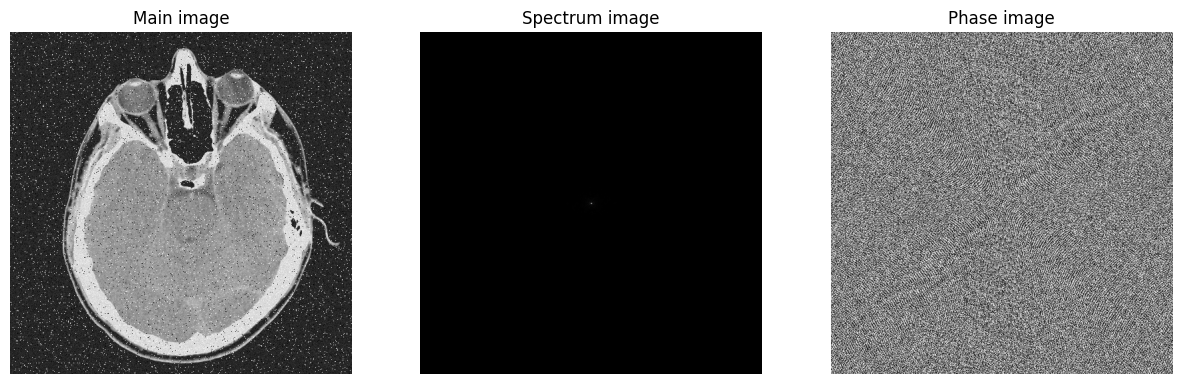

In [20]:
#@title Q5 - Part 4 (25%)
fft = fftshift(fft2(median_fillter))
Spectrum = np.abs(fft)
phase = np.angle(fft)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img, cmap='gray')
axs[0].set_title('Main image')

axs[1].imshow(Spectrum, cmap='gray')
axs[1].set_title('Spectrum image')

axs[2].imshow(phase, cmap='gray')
axs[2].set_title('Phase image')

for ax in axs:
    ax.axis('off')
plt.show()

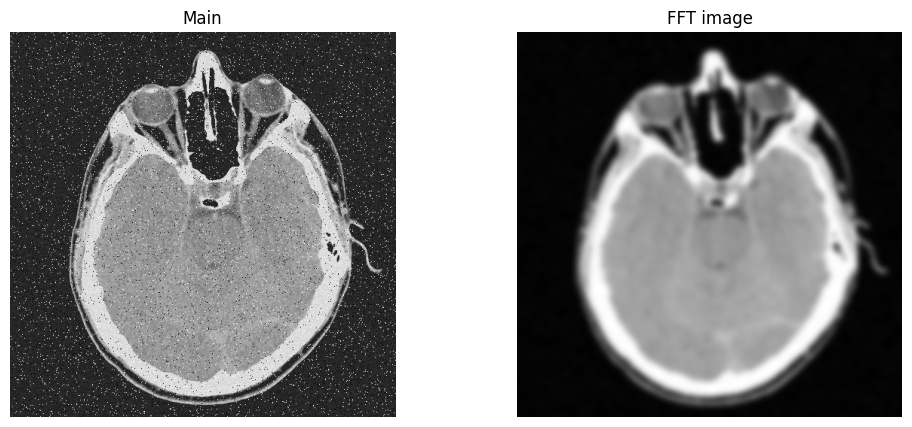

In [21]:
#@title Q5 - Part 5 (30%)
def gaussian_filter(image_shape, radius, sigma):
    height, width = image_shape
    center = (height // 2, width // 2)
    array = np.zeros((height, width))

    for i in range(height):
        for j in range(width):
            distance = np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2)
            array[i, j] = np.exp(-distance ** 2 / (2 * sigma ** 2))

    array /= np.sum(array)
    return array

def set_filter(image, filter):
    fft_image = fftshift(fft2(image))
    filtered_image = fft_image * filter
    return np.real(ifft2(np.fft.ifftshift(filtered_image)))

radius = 50
sigma = 20
filter = gaussian_filter(fft.shape, radius, sigma)
FFT = set_filter(median_fillter, filter)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Main')
axs[1].imshow(FFT, cmap='gray')
axs[1].set_title('FFT image')

for ax in axs:
    ax.axis('off')
plt.show()

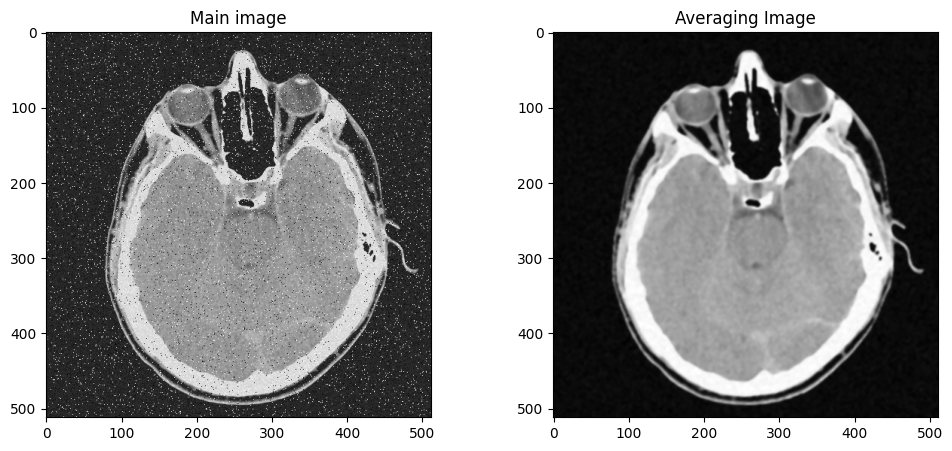

In [22]:
#@title Q5 - Part 6 (10%)
averaging_image = cv.GaussianBlur(median_fillter, (5, 5), 0)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Main image')
axs[1].imshow(averaging_image, cmap='gray')
axs[1].set_title('Averaging Image')
plt.show()

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال ۵-۶</font>
<div>
<font size="4">
با فیلتر میانگیری می توانیم نویز رو تضعیف کنیم و اثر آن را کاهش دهیم (تصویر  smooth تر می شود) مانند مثال صفحه 18 اسلاید 5
 </font><br />
</div>

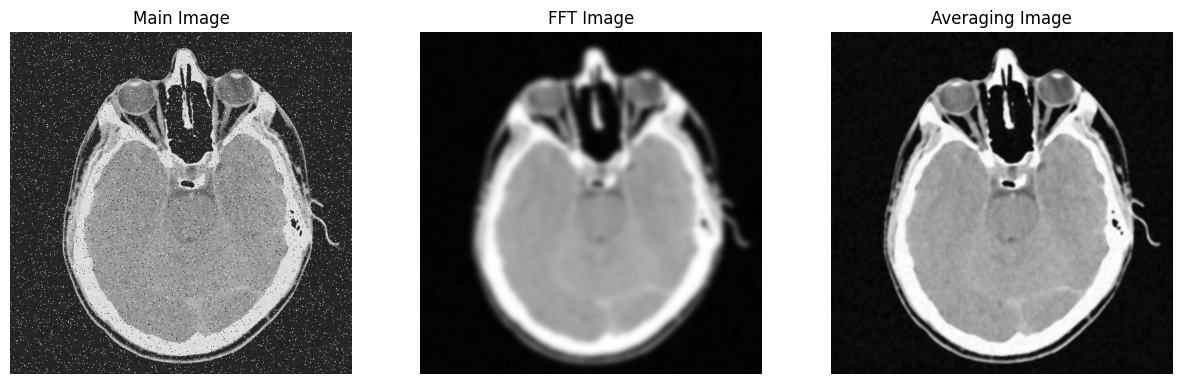

In [23]:
#@title Q5 - Part 7 (10%)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img, cmap='gray')
axs[0].set_title('Main Image')

axs[1].imshow(FFT, cmap='gray')
axs[1].set_title('FFT Image')

axs[2].imshow(averaging_image, cmap='gray')
axs[2].set_title('Averaging Image')

for ax in axs:
    ax.axis('off')
plt.show()

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال(با توجه به اصلاحیه جدید که باید فیلتر گوسی  رو روی تصویر بدون نویز میزدیم) ۵-۷</font>
<div>
<font size="4">
فیلتر میانگین گیری بهتر عمل کرده است بخاطر اینکه نویز های نمک و فلفل رو با توجه به خاصیتی که داشته است(تضعیف impulseهای ناخواسته) بهتر حذف کرده است و تصویر smooth تری را در اختیار ما گذاشته است

در فیلتر گاووسین ما وزن میدیم به هر پیکسل و پیکسلی که دورترباشد وزن کمتری دارد(با توجه به خاصیت تابع گاووسین)با توجه به شعاع و سیگمایی که قرار دادیم تصویر میزان تار بودنش تغییر می کند.

فیلتر گاوسی از کانولوشن استفاده می کند و بسیار کندتر از میانگین گیری است.

فیلتر میانگین برای کاهش نویز تصادفی بهتر عمل میکند.
 </font><br />
</div>

# Question 6: High Pass Filters (30%)

In [24]:
#@title Q6 - Part 1 (15%)
def filtred_by_laplacian(image, angle):

    if angle == 90:
        kernel = np.array([[1, 1, 1],
                           [1, -8, 1],
                           [1, 1, 1]])
    elif angle == 45:
        kernel = np.array([[0, 1, 0],
                           [1, -4, 1],
                           [0, 1, 0]])

    filtere_laplacian_img = cv.filter2D(image, -1, kernel)

    return filtere_laplacian_img

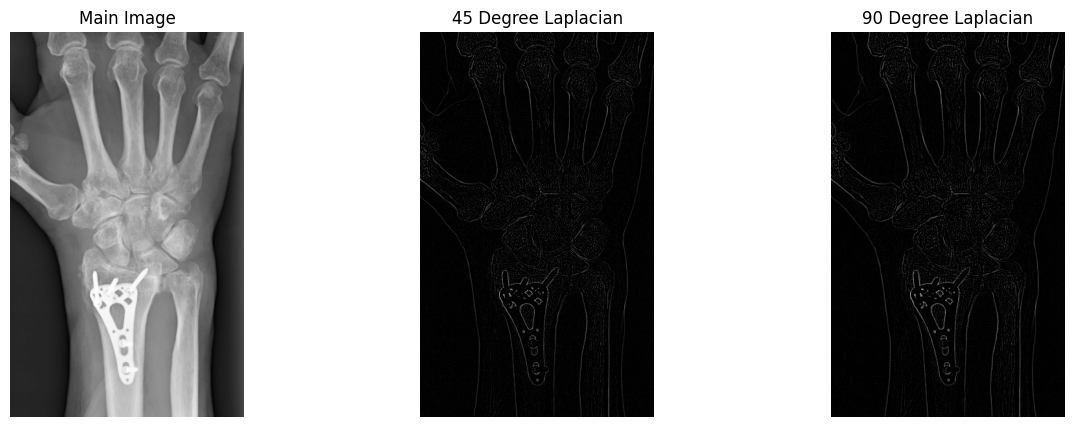

In [25]:
#@title Q6 - Part 2 (15%)
img2 = cv.imread('Hand.png', cv.IMREAD_GRAYSCALE)
image_45_degree = filtred_by_laplacian(img2, 45)
image_90_degree = filtred_by_laplacian(img2, 90)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img2, cmap='gray')
axs[0].set_title('Main Image')

axs[1].imshow(image_45_degree, cmap='gray')
axs[1].set_title('45 Degree Laplacian')

axs[2].imshow(image_90_degree, cmap='gray')
axs[2].set_title('90 Degree Laplacian')

for ax in axs:
    ax.axis('off')
plt.show()

<div dir=rtl><font color='green' size="5">## توضیحات سوال ۶-۲</font>
<div>

<div dir=rtl><font size="4">
در تصویر 45 درجه تقارن داریم( بخاطر خاصیت ماتریش)که باعث می شود که لبه های عکس بهتر دیده شود اما درتصویر 90 درجه لبه ها مقداری کمتر از حالت قبلی sharpتر هستند  
 </font><br />
</div>

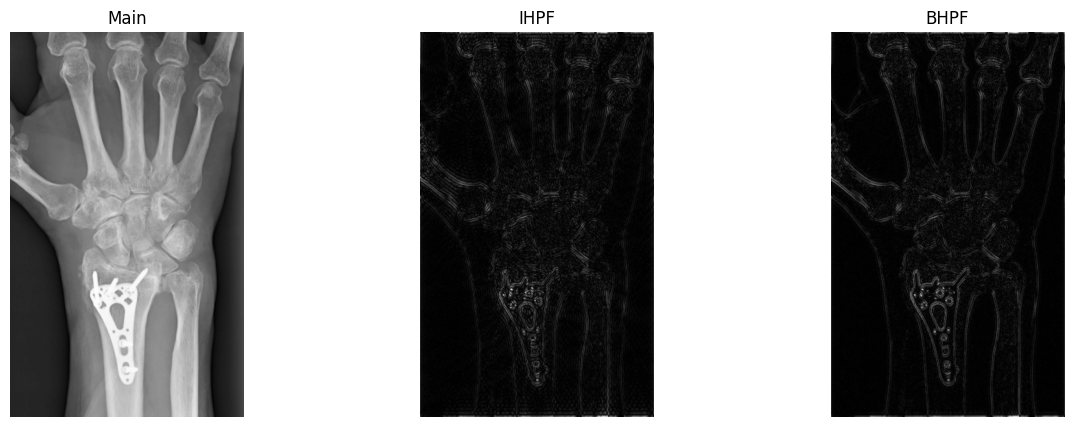

In [26]:
#@title Q6 - Part 3 (40%)
def apply_filter(image, name_of_filter, property):
    spectrum = np.fft.fftshift(np.fft.fft2(image))
    rows, cols = image.shape
    center_row, center_col = int(rows/2), int(cols/2)
    mask = np.zeros((rows, cols), dtype=np.float32)
    if name_of_filter == 'IHPF':
        cutoff_frequency = property
        for i in range(rows):
            for j in range(cols):
                x = ((i - center_row) ** 2 + (j - center_col) ** 2) ** 0.5
                if x <= cutoff_frequency:
                    mask[i][j] = 1

    elif name_of_filter == 'BHPF':
        cutoff_frequency = property
        filter_degree = 2
        for i in range(rows):
            for j in range(cols):
                x = ((i - center_row) ** 2 + (j - center_col) ** 2) ** 0.5
                mask[i][j]=1/(1+(x/cutoff_frequency) ** (2 * filter_degree))

    spectrum_filter = spectrum * (1 - mask)
    return np.abs(np.fft.ifft2(np.fft.ifftshift(spectrum_filter)))


image_IHPF = apply_filter(img2, 'IHPF', 50)
image_BHPF = apply_filter(img2, 'BHPF', 50)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img2, cmap='gray')
axs[0].set_title('Main')

axs[1].imshow(image_IHPF, cmap='gray')
axs[1].set_title('IHPF')

axs[2].imshow(image_BHPF, cmap='gray')
axs[2].set_title('BHPF')

for ax in axs:
    ax.axis('off')
plt.show()

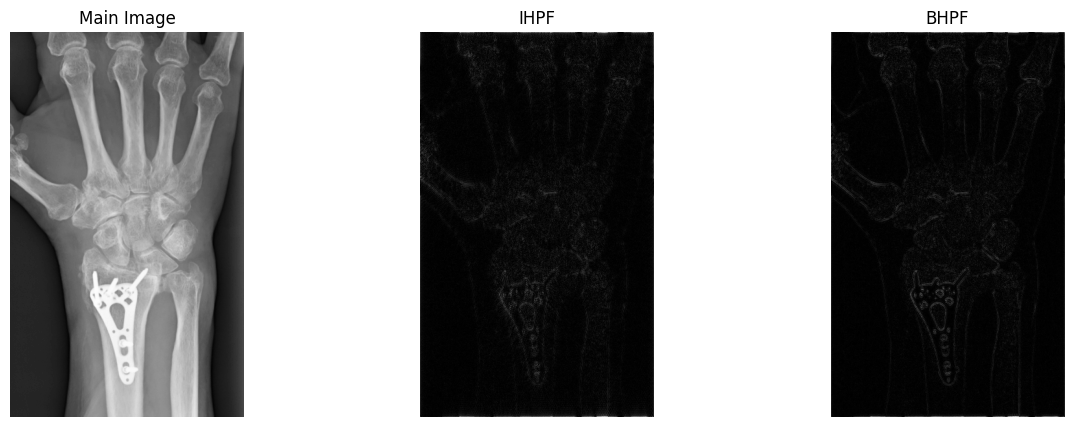

In [27]:
#@title Q6 - Part 4 (15%)
# شعاع 50 در مرحله قبل خروجی گرفته شده است
IHPF = apply_filter(img2, 'IHPF', 100)
BHPF = apply_filter(img2, 'BHPF', 100)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img2, cmap='gray')
axs[0].set_title('Main Image')

axs[1].imshow(IHPF, cmap='gray')
axs[1].set_title('IHPF')

axs[2].imshow(BHPF, cmap='gray')
axs[2].set_title('BHPF')

for ax in axs:
    ax.axis('off')
plt.show()

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال  ۶-۴</font>
<div>
<font size="4">
BHPF لبه ها را یکنواخت تر نشان می دهد و تمرکز روی لبه اصلی دارد  ولی در IHPF
لبه ها و تصویر با جزئیات بیشتری نشان داده شده است

با بزرگتر شدن شعاع لبه ها کم رنگ تر میشوند و جزئیات کمتری را مشاهده می کنیم.
 </font><br />
</div>

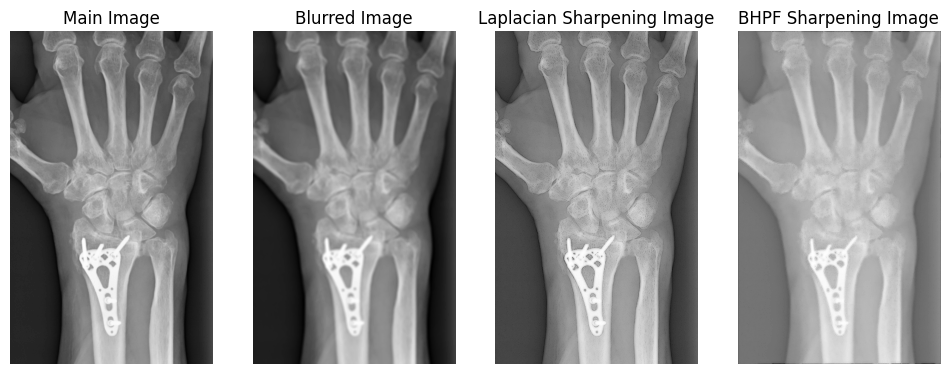

In [28]:
#@title Q6 - Part 5 (15%)
img3 = cv.imread('Blur_Hand.png', cv.IMREAD_GRAYSCALE)

laplace_img = filtred_by_laplacian(img2, 45)
image_BHPF = apply_filter(img2, 'BHPF', 100)
sharpping_img1 = img3 - 1.53 * laplace_img
sharpping_img2 = img3 - 3.5 * image_BHPF


fig, axs = plt.subplots(1, 4, figsize=(12, 5))

axs[0].imshow(img2, cmap='gray')
axs[0].set_title('Main Image')

axs[1].imshow(img3, cmap='gray')
axs[1].set_title('Blurred Image')

axs[2].imshow(sharpping_img1, cmap='gray')
axs[2].set_title('Laplacian Sharpening Image')

axs[3].imshow(sharpping_img2 , cmap='gray')
axs[3].set_title('BHPF Sharpening Image')

for ax in axs:
    ax.axis('off')
plt.show()

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال ۶-۵</font>
<div>
<font size="4">
در BHPF کنتراست تصویر کم شده است و رنگ ها تمایز کمتری دارند اما لاپلاسین عملکرد خوبی داشته است و به تصویر اصلی شبیه تر است و جزئیات بیشتری را حفظ کرده است
 </font><br />
</div>